In [ ]:
PATH_MODULES = "../prototipos/"
exec(open(PATH_MODULES+"setup.py").read())

Drive already mounted at /content/mydrive; to attempt to forcibly remount, call drive.mount("/content/mydrive", force_remount=True).
numpy version:  1.18.5
essentia version:  2.1-beta6-dev


In [ ]:
from essentia.standard import RhythmDescriptors,\
                              RhythmExtractor2013,\
                              AudioOnsetsMarker,\
                              AudioWriter,\
                              StereoMuxer

In [ ]:
#Working Audios
was = load_audio_from_project(audios_path=PATH_RITMOS)

Loaded Capoeira.m4a with sampleRate: 44100
Loaded Tercina-0.m4a with sampleRate: 44100
Loaded Tercina-1.m4a with sampleRate: 44100
Loaded PartidoAltoBatucada.m4a with sampleRate: 44100
Loaded PartidoAlto_v1_var1.m4a with sampleRate: 44100
Loaded PartidoAlto_v1_var2.m4a with sampleRate: 44100
Loaded PartidoAlto_v1.m4a with sampleRate: 44100
Loaded PartidoAlto_v1+Paradinha-0.m4a with sampleRate: 44100
Loaded PartidoAlto_v1+Paradinha-1.m4a with sampleRate: 44100
Loaded PartidoAlto_v2.m4a with sampleRate: 44100
Loaded PartidoAlto_v2+Paradinha.m4a with sampleRate: 44100


In [ ]:
print(sorted(was.keys()))
print(working_audio.keys())

['Capoeira.m4a', 'PartidoAltoBatucada.m4a', 'PartidoAlto_v1+Paradinha-0.m4a', 'PartidoAlto_v1+Paradinha-1.m4a', 'PartidoAlto_v1.m4a', 'PartidoAlto_v1_var1.m4a', 'PartidoAlto_v1_var2.m4a', 'PartidoAlto_v2+Paradinha.m4a', 'PartidoAlto_v2.m4a', 'Tercina-0.m4a', 'Tercina-1.m4a']
dict_keys(['data', 'path', 'sample_rate', 'metadata'])


In [ ]:
working_audio = was['PartidoAlto_v1.m4a']


####[RhythmDescriptors](https://essentia.upf.edu/reference/streaming_RhythmDescriptors.html)



Inputs:

 - signal (real) - the input audio signal

Outputs:

 - beats_position (vector_real) - See [RhythmExtractor2013](https://essentia.upf.edu/reference/std_RhythmExtractor2013.html) algorithm documentation
 - confidence (real) - See [RhythmExtractor2013](https://essentia.upf.edu/reference/std_RhythmExtractor2013.html) algorithm documentation
 - bpm (real) - See [RhythmExtractor2013](https://essentia.upf.edu/reference/std_RhythmExtractor2013.html) algorithm documentation
 - bpm_estimates (vector_real) - See [RhythmExtractor2013](https://essentia.upf.edu/reference/std_RhythmExtractor2013.html) algorithm documentation
 - bpm_intervals (vector_real) - See [RhythmExtractor2013](https://essentia.upf.edu/reference/std_RhythmExtractor2013.html) algorithm documentation
 - first_peak_bpm (real) - See [BpmHistogramDescriptors](https://essentia.upf.edu/reference/std_BpmHistogramDescriptors.html) algorithm documentation
 - first_peak_spread (real) - See [BpmHistogramDescriptors](https://essentia.upf.edu/reference/std_BpmHistogramDescriptors.html) algorithm documentation
 - first_peak_weight (real) - See [BpmHistogramDescriptors](https://essentia.upf.edu/reference/std_BpmHistogramDescriptors.html) algorithm documentation
 - second_peak_bpm (real) - See [BpmHistogramDescriptors](https://essentia.upf.edu/reference/std_BpmHistogramDescriptors.html) algorithm documentation
 - second_peak_spread (real) - See [BpmHistogramDescriptors](https://essentia.upf.edu/reference/std_BpmHistogramDescriptors.html) algorithm documentation
 - second_peak_weight (real) - See [BpmHistogramDescriptors](https://essentia.upf.edu/reference/std_BpmHistogramDescriptors.html) algorithm documentation
 - histogram (vector_real) - bpm histogram [bpm]



Obs.: confidence [segue](https://essentia.upf.edu/reference/std_BeatTrackerMultiFeature.html), aproximadamente:
 - `[0, 1) very low confidence, the input signal is hard for the employed candidate beat trackers`
 - `[1, 1.5] low confidence`
 - `(1.5, 3.5] good confidence, accuracy around 80% in AMLt measure`
 - `(3.5, 5.32] excellent confidence`



In [ ]:
RD = RhythmDescriptors()

In [ ]:
RD_result = RD(working_audio['data'])
len(RD_result)

12

In [ ]:
RD_dict = {}

RD_dict['beats_position'] = RD_result[0]
RD_dict['confidence'] = RD_result[1]
RD_dict['bpm'] = RD_result[2]
RD_dict['bpm_estimates'] = RD_result[3]
RD_dict['bpm_intervals'] = RD_result[4]
RD_dict['first_peak_bpm'] = RD_result[5]
RD_dict['first_peak_spread'] = RD_result[6]
RD_dict['first_peak_weight'] = RD_result[7]
RD_dict['second_peak_bpm'] = RD_result[8]
RD_dict['second_peak_spread'] = RD_result[9]
RD_dict['second_peak_weight'] = RD_result[10]
RD_dict['histogram'] = RD_result[11]

RD_dict

{'beats_position': array([ 0.4527891,  0.8939682,  1.3351474,  1.7763265,  2.2175057,
         2.6470747,  3.065034 ,  3.4829931,  3.9241722,  4.469841 ,
         4.9458504,  5.387029 ,  5.8049884,  6.2577777,  6.803447 ,
         7.2678456,  7.709025 ,  8.126984 ,  8.602993 ,  9.125442 ,
         9.589841 , 10.03102  , 10.448979 , 10.913379 , 11.366168 ,
        11.795736 , 12.236916 , 12.666485 , 13.096054 , 13.560453 ,
        14.001633 , 14.489251 , 14.988481 , 15.499319 , 15.9985485],
       dtype=float32),
 'bpm': 136.48220825195312,
 'bpm_estimates': array([135.99918, 135.99918, 135.99918, 135.99918, 139.67488, 135.9992 ,
        135.99928, 132.51196, 135.99913, 135.99913, 132.51196, 139.67511,
        135.99913, 139.6748 , 139.6748 , 135.99913], dtype=float32),
 'bpm_intervals': array([], dtype=float32),
 'confidence': 1.9082353115081787,
 'first_peak_bpm': 136.0,
 'first_peak_spread': 0.375,
 'first_peak_weight': 0.29411765933036804,
 'histogram': array([0.        , 0.        

<BarContainer object of 20 artists>

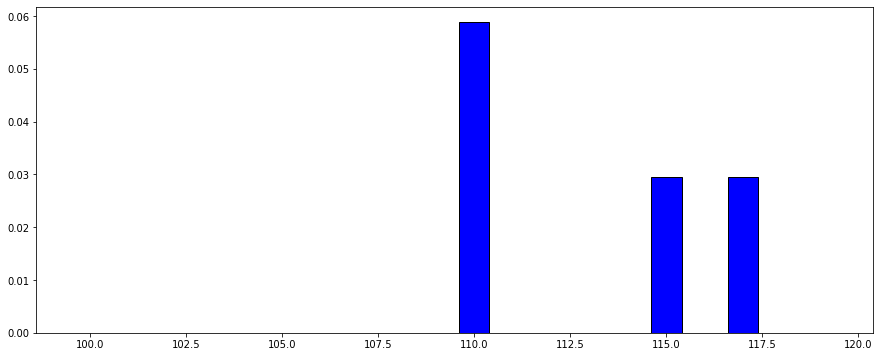

In [ ]:
hist_min = 100
hist_max = 120
plt.bar([x for x in range(hist_min,hist_max)],RD_dict['histogram'][hist_min:hist_max], color='blue', edgecolor='black')

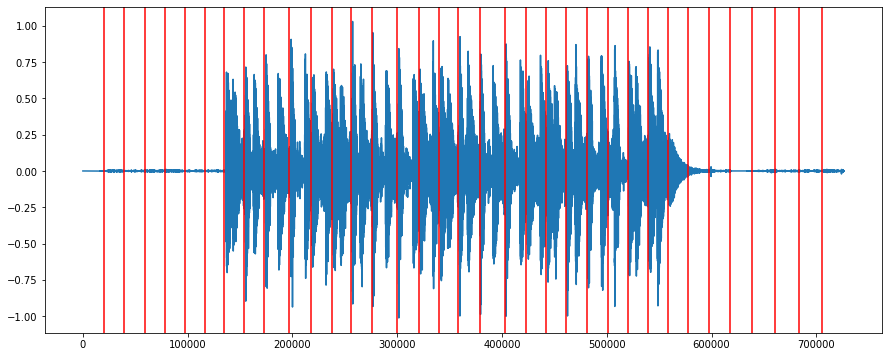

In [ ]:
beats = RD_dict['beats_position']

def aux():
  for beat in beats:
      plt.axvline(x=beat*working_audio['sample_rate'], color='red')

see_audio(working_audio['data'],aux)

In [ ]:
subAudio = working_audio['data']
sampleRate = working_audio['sample_rate']

silence = [0.] * len(subAudio)
beeps = AudioOnsetsMarker(onsets=beats, type='beep', sampleRate=sampleRate)(silence)
# beeps = AudioOnsetsMarker(onsets=[], type='beep', sampleRate=sampleRate)(silence)
AudioWriter(filename='final.wav', format='wav', sampleRate=sampleRate)(StereoMuxer()(subAudio, beeps))
hear_audio('final.wav')

Output hidden; open in https://colab.research.google.com to view.


####[RhythmExtractor2013](https://essentia.upf.edu/reference/std_RhythmExtractor2013.html)


Inputs:

 - signal (vector_real) - the audio input signal

Outputs:

 - bpm (real) - the tempo estimation [bpm]
 - ticks (vector_real) - the estimated tick locations [s]
 - confidence (real) - confidence with which the ticks are detected (ignore this value if using 'degara' method)
 - estimates (vector_real) - the list of bpm estimates characterizing the bpm distribution for the signal [bpm]
 - bpmIntervals (vector_real) - list of beats interval [s]



Obs.: confidence [segue](https://essentia.upf.edu/reference/std_BeatTrackerMultiFeature.html), aproximadamente:
 - `[0, 1) very low confidence, the input signal is hard for the employed candidate beat trackers`
 - `[1, 1.5] low confidence`
 - `(1.5, 3.5] good confidence, accuracy around 80% in AMLt measure`
 - `(3.5, 5.32] excellent confidence`



In [ ]:
RE = RhythmExtractor2013()
RE_result = RE(working_audio['data'])

In [ ]:
RE_dict = {}
RE_dict['bpm'] = RE_result[0]
RE_dict['ticks'] = RE_result[1]
RE_dict['confidence'] = RE_result[2]
RE_dict['estimates'] = RE_result[3]
RE_dict['bpmIntervals'] = RE_result[4]
RE_dict

{'bpm': 106.77709197998047,
 'bpmIntervals': array([0.5804988 , 0.5804988 , 0.5688889 , 0.5572789 , 0.5572789 ,
        0.5572791 , 0.5572789 , 0.55727863, 0.5572791 , 0.5572791 ,
        0.56888866, 0.56888866, 0.5572791 , 0.5572791 , 0.55727863,
        0.5456686 , 0.5688896 ], dtype=float32),
 'confidence': 3.7751381397247314,
 'estimates': array([103.35938, 103.35938, 105.46875, 107.66602, 107.66602, 107.66598,
        107.66602, 107.66607, 107.66598, 107.66598, 105.46879, 105.46879,
        107.66598, 107.66598, 107.66607, 109.95685, 105.46861],
       dtype=float32),
 'ticks': array([ 0.5688889,  1.1493877,  1.7298865,  2.2987754,  2.8560543,
         3.4133332,  3.9706123,  4.527891 ,  5.08517  ,  5.642449 ,
         6.199728 ,  6.7686167,  7.3375053,  7.8947845,  8.452064 ,
         9.009342 ,  9.555011 , 10.1239   ], dtype=float32)}

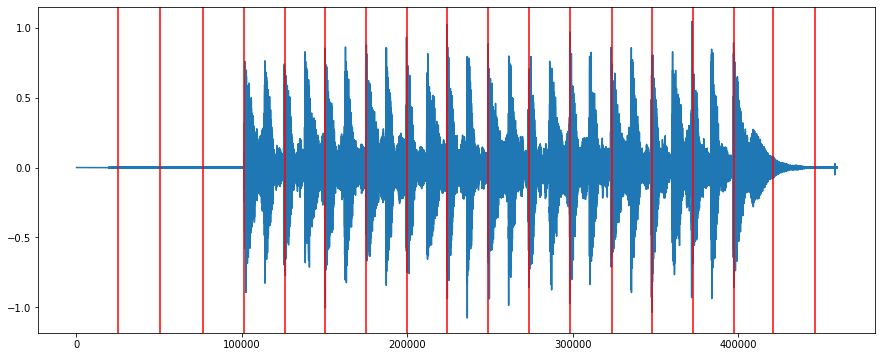

In [ ]:
beats = RE_dict['ticks']

def aux():
  for beat in beats:
      plt.axvline(x=beat*working_audio['sample_rate'], color='red')

see_audio(working_audio['data'],aux)

In [ ]:
subAudio = working_audio['data']
sampleRate = working_audio['sample_rate']

silence = [0.] * len(subAudio)
beeps = AudioOnsetsMarker(onsets=beats, type='beep', sampleRate=sampleRate)(silence)
AudioWriter(filename='temp.wav', format='wav', sampleRate=sampleRate)(StereoMuxer()(subAudio, beeps))
hear_audio('temp.wav')

Output hidden; open in https://colab.research.google.com to view.

####[RhythmTransform](https://essentia.upf.edu/reference/std_RhythmTransform.html)



Inputs:

 - melBands (vector_vector_real) - the energies in the mel bands

Outputs:

 - rhythm (vector_vector_real) - consecutive frames in the rhythm domain

Parameters:

 - frameSize (integer ∈ (0, ∞), default = 256) : the frame size to compute the rhythm trasform

 - hopSize (integer ∈ (0, ∞), default = 32) : the hop size to compute the rhythm transform



In [ ]:
from essentia import Pool
from essentia.standard import Spectrum, MelBands, RhythmTransform

In [ ]:
#Prepara o que vai executar nos frames
pool = Pool()
spec = Spectrum()
mel = MelBands()
def inFrame(frame):
  spectrum = spec(frame)
  melBands = mel(spectrum)
  pool.add( "spectrum", spectrum )
  pool.add( "melBands", melBands )

In [ ]:
inFrames(working_audio['data'], inFrame)

900

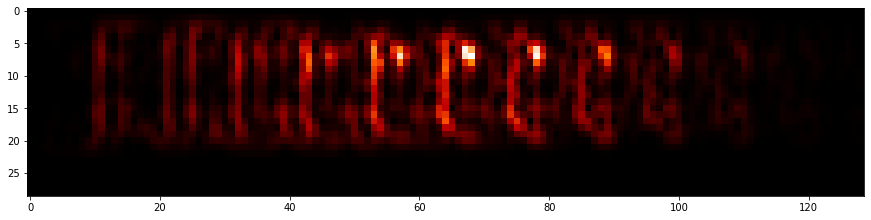

In [ ]:
im = RhythmTransform()(pool['melBands'])
plt.imshow(im,cmap=plt.cm.gist_heat)